## 1.1 Data Import and Clean

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

This is an example for prediction of glucose/blood sugar (glycémie).

In [86]:
# data path
train_filename = 'data1/d_train_20180102.csv'

''' there are two ways of doing encoding which includes 汉字:'''
#data = pd.read_csv(train_filename, sep=',', encoding='gb2312')
'''or by the following'''
data = pd.read_csv(train_filename, sep=',', encoding='gbk')
# fillna prefer not to be done when import data
#data = data.fillna('')
data

,id,性别,年龄,体检日期,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
0,1,男,41,12/10/2017,24.96,23.10,99.59,20.23,76.88,49.60,...,166.0,9.9,17.4,0.164,54.1,34.2,6.5,4.7,0.6,6.06
1,2,男,41,19/10/2017,24.57,36.25,67.21,79.00,79.43,47.76,...,277.0,9.2,10.3,0.260,52.0,36.7,5.8,4.7,0.8,5.39
2,3,男,46,26/10/2017,20.82,15.23,63.69,38.17,86.23,48.00,...,241.0,8.3,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59
3,4,女,22,25/10/2017,14.99,10.59,74.08,20.22,70.98,44.02,...,252.0,10.3,10.8,0.260,41.7,46.5,6.7,4.6,0.5,4.30
4,5,女,48,26/10/2017,20.07,14.78,75.79,22.72,78.05,41.83,...,316.0,11.1,14.0,0.350,56.6,33.1,9.1,0.6,0.6,5.42
5,6,女,74,18/10/2017,23.72,22.59,81.23,23.35,76.46,45.85,...,249.0,8.5,17.0,0.211,42.9,47.0,7.1,2.1,1.0,5.97
6,7,男,31,21/09/2017,24.97,25.53,109.03,65.42,80.82,46.40,...,246.0,10.8,13.3,0.270,52.9,32.0,11.3,3.1,0.7,5.11
7,8,男,55,21/09/2017,37.32,40.03,88.49,25.15,74.17,41.63,...,282.0,10.5,13.0,0.300,52.8,36.9,6.6,2.8,0.9,5.94
8,9,男,39,16/10/2017,21.70,39.17,102.91,67.09,76.12,49.31,...,275.0,9.8,11.4,0.270,53.1,35.9,7.3,3.3,0.4,5.66
9,10,女,35,10/10/2017,18.89,15.79,78.21,25.75,75.94,46.64,...,247.0,10.7,12.6,0.270,65.6,27.3,5.4,1.0,0.7,5.48


In [87]:
data.columns

Index(['id', '性别', '年龄', '体检日期', '*天门冬氨酸氨基转换酶', '*丙氨酸氨基转换酶', '*碱性磷酸酶',
       '*r-谷氨酰基转换酶', '*总蛋白', '白蛋白', '*球蛋白', '白球比例', '甘油三酯', '总胆固醇',
       '高密度脂蛋白胆固醇', '低密度脂蛋白胆固醇', '尿素', '肌酐', '尿酸', '乙肝表面抗原', '乙肝表面抗体', '乙肝e抗原',
       '乙肝e抗体', '乙肝核心抗体', '白细胞计数', '红细胞计数', '血红蛋白', '红细胞压积', '红细胞平均体积',
       '红细胞平均血红蛋白量', '红细胞平均血红蛋白浓度', '红细胞体积分布宽度', '血小板计数', '血小板平均体积',
       '血小板体积分布宽度', '血小板比积', '中性粒细胞%', '淋巴细胞%', '单核细胞%', '嗜酸细胞%', '嗜碱细胞%',
       '血糖'],
      dtype='object')

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5642 entries, 0 to 5641
Data columns (total 42 columns):
id             5642 non-null int64
性别             5642 non-null object
年龄             5642 non-null int64
体检日期           5642 non-null object
*天门冬氨酸氨基转换酶    4421 non-null float64
*丙氨酸氨基转换酶      4421 non-null float64
*碱性磷酸酶         4421 non-null float64
*r-谷氨酰基转换酶     4421 non-null float64
*总蛋白           4421 non-null float64
白蛋白            4421 non-null float64
*球蛋白           4421 non-null float64
白球比例           4421 non-null float64
甘油三酯           4423 non-null float64
总胆固醇           4423 non-null float64
高密度脂蛋白胆固醇      4423 non-null float64
低密度脂蛋白胆固醇      4423 non-null float64
尿素             4264 non-null float64
肌酐             4264 non-null float64
尿酸             4264 non-null float64
乙肝表面抗原         1363 non-null float64
乙肝表面抗体         1363 non-null float64
乙肝e抗原          1363 non-null float64
乙肝e抗体          1363 non-null float64
乙肝核心抗体         1363 non-null float64
白细胞计数      

In [89]:
# it's safe to save a copy for the original data
datacopy = data.copy()
datacopy.isnull().any().any()

True

In [90]:
col = data.columns.size
dic = dict()
d=0
for i in data.columns:
    dic[i] = "P"+str(d)
    d += 1

dic

{'*r-谷氨酰基转换酶': 'P7',
 '*丙氨酸氨基转换酶': 'P5',
 '*天门冬氨酸氨基转换酶': 'P4',
 '*总蛋白': 'P8',
 '*球蛋白': 'P10',
 '*碱性磷酸酶': 'P6',
 'id': 'P0',
 '中性粒细胞%': 'P36',
 '乙肝e抗体': 'P22',
 '乙肝e抗原': 'P21',
 '乙肝核心抗体': 'P23',
 '乙肝表面抗体': 'P20',
 '乙肝表面抗原': 'P19',
 '低密度脂蛋白胆固醇': 'P15',
 '体检日期': 'P3',
 '单核细胞%': 'P38',
 '嗜碱细胞%': 'P40',
 '嗜酸细胞%': 'P39',
 '尿素': 'P16',
 '尿酸': 'P18',
 '年龄': 'P2',
 '性别': 'P1',
 '总胆固醇': 'P13',
 '淋巴细胞%': 'P37',
 '甘油三酯': 'P12',
 '白球比例': 'P11',
 '白细胞计数': 'P24',
 '白蛋白': 'P9',
 '红细胞体积分布宽度': 'P31',
 '红细胞压积': 'P27',
 '红细胞平均体积': 'P28',
 '红细胞平均血红蛋白浓度': 'P30',
 '红细胞平均血红蛋白量': 'P29',
 '红细胞计数': 'P25',
 '肌酐': 'P17',
 '血小板体积分布宽度': 'P34',
 '血小板平均体积': 'P33',
 '血小板比积': 'P35',
 '血小板计数': 'P32',
 '血糖': 'P41',
 '血红蛋白': 'P26',
 '高密度脂蛋白胆固醇': 'P14'}

In [91]:
data.columns = ['id', 'sex', 'age', 'date'] + [dic[i] for i in data.columns[4:-1]] + ['sugar']

In [92]:
data

,id,sex,age,date,P4,P5,P6,P7,P8,P9,...,P32,P33,P34,P35,P36,P37,P38,P39,P40,sugar
0,1,男,41,12/10/2017,24.96,23.10,99.59,20.23,76.88,49.60,...,166.0,9.9,17.4,0.164,54.1,34.2,6.5,4.7,0.6,6.06
1,2,男,41,19/10/2017,24.57,36.25,67.21,79.00,79.43,47.76,...,277.0,9.2,10.3,0.260,52.0,36.7,5.8,4.7,0.8,5.39
2,3,男,46,26/10/2017,20.82,15.23,63.69,38.17,86.23,48.00,...,241.0,8.3,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59
3,4,女,22,25/10/2017,14.99,10.59,74.08,20.22,70.98,44.02,...,252.0,10.3,10.8,0.260,41.7,46.5,6.7,4.6,0.5,4.30
4,5,女,48,26/10/2017,20.07,14.78,75.79,22.72,78.05,41.83,...,316.0,11.1,14.0,0.350,56.6,33.1,9.1,0.6,0.6,5.42
5,6,女,74,18/10/2017,23.72,22.59,81.23,23.35,76.46,45.85,...,249.0,8.5,17.0,0.211,42.9,47.0,7.1,2.1,1.0,5.97
6,7,男,31,21/09/2017,24.97,25.53,109.03,65.42,80.82,46.40,...,246.0,10.8,13.3,0.270,52.9,32.0,11.3,3.1,0.7,5.11
7,8,男,55,21/09/2017,37.32,40.03,88.49,25.15,74.17,41.63,...,282.0,10.5,13.0,0.300,52.8,36.9,6.6,2.8,0.9,5.94
8,9,男,39,16/10/2017,21.70,39.17,102.91,67.09,76.12,49.31,...,275.0,9.8,11.4,0.270,53.1,35.9,7.3,3.3,0.4,5.66
9,10,女,35,10/10/2017,18.89,15.79,78.21,25.75,75.94,46.64,...,247.0,10.7,12.6,0.270,65.6,27.3,5.4,1.0,0.7,5.48


### change the specific character to numbers in the value, datetime string to pd.datetime

In [93]:
np.unique(datacopy["性别"])

array(['??', '女', '男'], dtype=object)

In [94]:
data.loc[data['sex'] == "男",'sex'] = 1
data.loc[data['sex'] == "女",'sex'] = 0
data.loc[data['sex'] == "??",'sex'] = np.nan
np.unique(data.sex)

array([0, nan, 0, 1], dtype=object)

In [95]:
data

,id,sex,age,date,P4,P5,P6,P7,P8,P9,...,P32,P33,P34,P35,P36,P37,P38,P39,P40,sugar
0,1,1,41,12/10/2017,24.96,23.10,99.59,20.23,76.88,49.60,...,166.0,9.9,17.4,0.164,54.1,34.2,6.5,4.7,0.6,6.06
1,2,1,41,19/10/2017,24.57,36.25,67.21,79.00,79.43,47.76,...,277.0,9.2,10.3,0.260,52.0,36.7,5.8,4.7,0.8,5.39
2,3,1,46,26/10/2017,20.82,15.23,63.69,38.17,86.23,48.00,...,241.0,8.3,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59
3,4,0,22,25/10/2017,14.99,10.59,74.08,20.22,70.98,44.02,...,252.0,10.3,10.8,0.260,41.7,46.5,6.7,4.6,0.5,4.30
4,5,0,48,26/10/2017,20.07,14.78,75.79,22.72,78.05,41.83,...,316.0,11.1,14.0,0.350,56.6,33.1,9.1,0.6,0.6,5.42
5,6,0,74,18/10/2017,23.72,22.59,81.23,23.35,76.46,45.85,...,249.0,8.5,17.0,0.211,42.9,47.0,7.1,2.1,1.0,5.97
6,7,1,31,21/09/2017,24.97,25.53,109.03,65.42,80.82,46.40,...,246.0,10.8,13.3,0.270,52.9,32.0,11.3,3.1,0.7,5.11
7,8,1,55,21/09/2017,37.32,40.03,88.49,25.15,74.17,41.63,...,282.0,10.5,13.0,0.300,52.8,36.9,6.6,2.8,0.9,5.94
8,9,1,39,16/10/2017,21.70,39.17,102.91,67.09,76.12,49.31,...,275.0,9.8,11.4,0.270,53.1,35.9,7.3,3.3,0.4,5.66
9,10,0,35,10/10/2017,18.89,15.79,78.21,25.75,75.94,46.64,...,247.0,10.7,12.6,0.270,65.6,27.3,5.4,1.0,0.7,5.48


In [96]:
data.date = pd.to_datetime(data.date)
data

,id,sex,age,date,P4,P5,P6,P7,P8,P9,...,P32,P33,P34,P35,P36,P37,P38,P39,P40,sugar
0,1,1,41,2017-12-10,24.96,23.10,99.59,20.23,76.88,49.60,...,166.0,9.9,17.4,0.164,54.1,34.2,6.5,4.7,0.6,6.06
1,2,1,41,2017-10-19,24.57,36.25,67.21,79.00,79.43,47.76,...,277.0,9.2,10.3,0.260,52.0,36.7,5.8,4.7,0.8,5.39
2,3,1,46,2017-10-26,20.82,15.23,63.69,38.17,86.23,48.00,...,241.0,8.3,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59
3,4,0,22,2017-10-25,14.99,10.59,74.08,20.22,70.98,44.02,...,252.0,10.3,10.8,0.260,41.7,46.5,6.7,4.6,0.5,4.30
4,5,0,48,2017-10-26,20.07,14.78,75.79,22.72,78.05,41.83,...,316.0,11.1,14.0,0.350,56.6,33.1,9.1,0.6,0.6,5.42
5,6,0,74,2017-10-18,23.72,22.59,81.23,23.35,76.46,45.85,...,249.0,8.5,17.0,0.211,42.9,47.0,7.1,2.1,1.0,5.97
6,7,1,31,2017-09-21,24.97,25.53,109.03,65.42,80.82,46.40,...,246.0,10.8,13.3,0.270,52.9,32.0,11.3,3.1,0.7,5.11
7,8,1,55,2017-09-21,37.32,40.03,88.49,25.15,74.17,41.63,...,282.0,10.5,13.0,0.300,52.8,36.9,6.6,2.8,0.9,5.94
8,9,1,39,2017-10-16,21.70,39.17,102.91,67.09,76.12,49.31,...,275.0,9.8,11.4,0.270,53.1,35.9,7.3,3.3,0.4,5.66
9,10,0,35,2017-10-10,18.89,15.79,78.21,25.75,75.94,46.64,...,247.0,10.7,12.6,0.270,65.6,27.3,5.4,1.0,0.7,5.48


### Deal with NA values or missing values 

Re1: sometimes if you fillna('') at first, you see that some columns are object, because they have missing values which are replaced by str "".

Re2: the incomplete data matrix is recommended to be saved, as they may be completed in different ways (matrix completion, eg.).

Here, we use the average value to complete NAN from P4 to P40, and fill -1 for missing values of sex column

In [97]:
# save the data matrix before replace nan value (may be useful in matrix completion)
data_incomp = data.copy()

In [98]:
# it can be shown that in some column, missing value part is large !
np.sum(data_incomp.isnull())/data_incomp.shape[0]

id       0.000000
sex      0.000177
age      0.000000
date     0.000000
P4       0.216413
P5       0.216413
P6       0.216413
P7       0.216413
P8       0.216413
P9       0.216413
P10      0.216413
P11      0.216413
P12      0.216058
P13      0.216058
P14      0.216058
P15      0.216058
P16      0.244240
P17      0.244240
P18      0.244240
P19      0.758419
P20      0.758419
P21      0.758419
P22      0.758419
P23      0.758419
P24      0.002836
P25      0.002836
P26      0.002836
P27      0.002836
P28      0.002836
P29      0.002836
P30      0.002836
P31      0.002836
P32      0.002836
P33      0.004077
P34      0.004077
P35      0.004077
P36      0.002836
P37      0.002836
P38      0.002836
P39      0.002836
P40      0.002836
sugar    0.000000
dtype: float64

In [99]:
np.unique(data_incomp.sex), np.unique(datacopy["性别"])

(array([0, nan, 0, 1], dtype=object), array(['??', '女', '男'], dtype=object))

In [100]:
data.isnull().any()

id       False
sex       True
age      False
date     False
P4        True
P5        True
P6        True
P7        True
P8        True
P9        True
P10       True
P11       True
P12       True
P13       True
P14       True
P15       True
P16       True
P17       True
P18       True
P19       True
P20       True
P21       True
P22       True
P23       True
P24       True
P25       True
P26       True
P27       True
P28       True
P29       True
P30       True
P31       True
P32       True
P33       True
P34       True
P35       True
P36       True
P37       True
P38       True
P39       True
P40       True
sugar    False
dtype: bool

### the original shape of data

In [101]:
data.shape
#data["P4":"P40"] = np.float(data["P4":"P40"]) 

(5642, 42)

### note the difference between the following two ways of drop na

In [102]:
# drop observation that contains NAN
df_no_missing_obs = data.dropna()
df_no_missing_obs.shape

(1354, 42)

In [103]:
# drop missing rows that are all NAN
df_no_missing_col = data.dropna(how="all")
df_no_missing_col.shape, data.shape

((5642, 42), (5642, 42))

### but usually we only want to fill na, will use fillna() and mean()

In [104]:
data.loc[:,"P4":"P40"].isnull().any().any()

True

In [105]:
# you can use this : (1)

In [106]:
data2 = data.copy()
data2.loc[:,"P4":"P40"].isnull().any().any()

True

In [107]:
data2.loc[:,"P4":"P40"] = data2.loc[:,"P4":"P40"].fillna(data2.loc[:,"P4":"P40"].mean())
data2.loc[:, "P4": "P40"].isnull().any().any()

False

In [108]:
# inplace doesn't always work !

In [109]:
data2 = data.copy()
data2.loc[:,"P4":"P40"].isnull().any().any()

True

In [110]:
data2.loc[:,"P4":"P40"].fillna(data2.loc[:,"P4":"P40"].mean(), inplace=True)
data2.loc[:, "P4": "P40"].isnull().any().any()

True

In [111]:
# so by the method (1), check that we got the same average for each column
data.loc[:,"P4":"P40"].isnull().any().any()
data.loc[:,"P4":"P40"].mean()

P4      26.805892
P5      27.652020
P6      87.482278
P7      38.823762
P8      76.771108
P9      45.822504
P10     30.948604
P11      1.502538
P12      1.846005
P13      5.230631
P14      1.390036
P15      3.362935
P16      4.985687
P17     78.464751
P18    355.631508
P19      0.950393
P20      7.005806
P21      0.073224
P22      1.751340
P23      1.886628
P24      6.589197
P25      4.957087
P26    147.978973
P27      0.440733
P28     89.048134
P29     29.883132
P30    335.417526
P31     12.737736
P32    253.085318
P33     10.653444
P34     13.304414
P35      0.267907
P36     56.718468
P37     33.778546
P38      6.856772
P39      2.043797
P40      0.603697
dtype: float64

In [112]:
data.loc[:,"P4":"P40"] = data.loc[:,"P4":"P40"].fillna(data.loc[:,"P4":"P40"].mean())
data.loc[:,"P4":"P40"].mean()

P4      26.805892
P5      27.652020
P6      87.482278
P7      38.823762
P8      76.771108
P9      45.822504
P10     30.948604
P11      1.502538
P12      1.846005
P13      5.230631
P14      1.390036
P15      3.362935
P16      4.985687
P17     78.464751
P18    355.631508
P19      0.950393
P20      7.005806
P21      0.073224
P22      1.751340
P23      1.886628
P24      6.589197
P25      4.957087
P26    147.978973
P27      0.440733
P28     89.048134
P29     29.883132
P30    335.417526
P31     12.737736
P32    253.085318
P33     10.653444
P34     13.304414
P35      0.267907
P36     56.718468
P37     33.778546
P38      6.856772
P39      2.043797
P40      0.603697
dtype: float64

### we still got sex not fill na

In [113]:
data.sex.fillna(-1, inplace=True)
data.isnull().any(), np.unique(data.sex)

(id       False
 sex      False
 age      False
 date     False
 P4       False
 P5       False
 P6       False
 P7       False
 P8       False
 P9       False
 P10      False
 P11      False
 P12      False
 P13      False
 P14      False
 P15      False
 P16      False
 P17      False
 P18      False
 P19      False
 P20      False
 P21      False
 P22      False
 P23      False
 P24      False
 P25      False
 P26      False
 P27      False
 P28      False
 P29      False
 P30      False
 P31      False
 P32      False
 P33      False
 P34      False
 P35      False
 P36      False
 P37      False
 P38      False
 P39      False
 P40      False
 sugar    False
 dtype: bool, array([-1,  0,  1]))

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5642 entries, 0 to 5641
Data columns (total 42 columns):
id       5642 non-null int64
sex      5642 non-null int64
age      5642 non-null int64
date     5642 non-null datetime64[ns]
P4       5642 non-null float64
P5       5642 non-null float64
P6       5642 non-null float64
P7       5642 non-null float64
P8       5642 non-null float64
P9       5642 non-null float64
P10      5642 non-null float64
P11      5642 non-null float64
P12      5642 non-null float64
P13      5642 non-null float64
P14      5642 non-null float64
P15      5642 non-null float64
P16      5642 non-null float64
P17      5642 non-null float64
P18      5642 non-null float64
P19      5642 non-null float64
P20      5642 non-null float64
P21      5642 non-null float64
P22      5642 non-null float64
P23      5642 non-null float64
P24      5642 non-null float64
P25      5642 non-null float64
P26      5642 non-null float64
P27      5642 non-null float64
P28      5642 non-null f

## 1.2 Statistical Analysis and Visualisation

Now we are ready to do some statistical analysis and visualisation, this is important for generating ideas. You can always return to this part when got stuck.

In [115]:
data_analyse = data.copy()

(array([  5.50100000e+03,   1.22000000e+02,   1.40000000e+01,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  10.04 ,   52.531,   95.022,  137.513,  180.004,  222.495,
         264.986,  307.477,  349.968,  392.459,  434.95 ]),
 <a list of 10 Patch objects>)

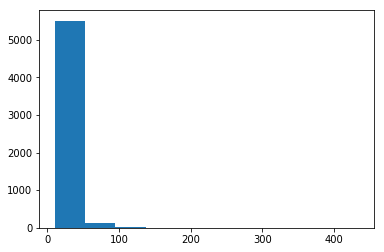

In [116]:
plt.hist(data_analyse.P4)

((array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   2.76500000e+03,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           2.87600000e+03]),
  array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
  <a list of 10 Patch objects>),
 1)

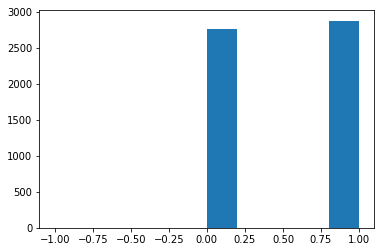

In [117]:
l = np.array([i for i in np.unique(data_analyse.sex)])
plt.hist(data_analyse.sex), np.sum(l==-1)

## 1.3 Normalisation data (this may not even be necessary for some algo. like decision trees)

If you want to write the code by yourself, one remark is to take care of 0 mean and 0 deviation.

In [118]:
from sklearn import preprocessing

In [119]:
train_data_org = data.drop(['id','date'],axis = 1)
X_org = train_data_org.loc[:, "sex": "P40"]
y_org = train_data_org.sugar

In [120]:
## standardize to mean 0, std = 1

In [121]:
scaler = preprocessing.StandardScaler().fit(train_data_org)
train_data = pd.DataFrame(scaler.fit_transform(train_data_org), 
                          columns=train_data_org.columns, 
                          index=train_data_org.index) 
train_data

,sex,age,P4,P5,P6,P7,P8,P9,P10,P11,...,P32,P33,P34,P35,P36,P37,P38,P39,P40,sugar
0,0.980343,-0.353409,-1.537644e-01,-2.274468e-01,5.337084e-01,-5.150356e-01,3.063376e-02,1.630569e+00,-1.162319e+00,1.625735e+00,...,-1.463693,-0.766173,1.888160,-1.721040,-0.336211,0.058195,-0.227937,1.554861,-0.012691,0.277117
1,0.980343,-0.353409,-1.862518e-01,4.296077e-01,-8.936020e-01,1.112857e+00,7.480083e-01,8.363268e-01,2.285588e-01,3.821375e-02,...,0.401948,-1.478000,-1.385104,-0.130967,-0.605850,0.403395,-0.675159,1.554861,0.673838,-0.156612
2,0.980343,0.032369,-4.986301e-01,-6.206802e-01,-1.048764e+00,-1.810879e-02,2.661007e+00,9.399237e-01,2.306954e+00,-1.242045e+00,...,-0.203125,-2.393205,1.519342,-1.141326,-1.106609,0.900485,0.538728,0.676806,0.673838,-0.027140
3,-1.018607,-1.819369,-9.842741e-01,-8.525230e-01,-5.907724e-01,-5.153126e-01,-1.629174e+00,-7.780570e-01,-1.263704e+00,6.527381e-01,...,-0.018242,-0.359415,-1.154593,-0.130967,-1.928367,1.756583,-0.100160,1.496324,-0.355955,-0.862230
4,-1.018607,0.186681,-5.611057e-01,-6.431649e-01,-5.153956e-01,-4.460642e-01,3.597821e-01,-1.723378e+00,1.670129e+00,-1.805359e+00,...,1.057443,0.454101,0.320681,1.359726,-0.015211,-0.093694,1.433171,-0.845155,-0.012691,-0.137191
5,-1.018607,2.192730,-2.570575e-01,-2.529295e-01,-2.756004e-01,-4.286135e-01,-8.752204e-02,1.186876e-02,-1.072796e-01,-1.299661e-02,...,-0.068664,-2.189826,1.703751,-0.942567,-1.774287,1.825623,0.155395,0.032900,1.360367,0.218855
6,0.980343,-1.124967,-1.529314e-01,-1.060291e-01,9.498236e-01,7.366992e-01,1.139048e+00,2.492782e-01,1.099837e+00,-7.811521e-01,...,-0.119087,0.149032,-0.002035,0.034665,-0.490290,-0.245582,2.838725,0.618270,0.330574,-0.337871
7,0.980343,0.726771,8.758343e-01,6.184797e-01,4.442040e-02,-3.787547e-01,-7.317525e-01,-1.809709e+00,5.041997e-01,-1.139625e+00,...,0.485986,-0.156036,-0.140342,0.531563,-0.503130,0.431011,-0.164049,0.442659,1.017103,0.199434
8,0.980343,-0.507721,-4.253253e-01,5.755088e-01,6.800540e-01,7.829572e-01,-1.831720e-01,1.505390e+00,-1.311228e+00,1.728156e+00,...,0.368333,-0.867863,-0.877979,0.034665,-0.464610,0.292931,0.283173,0.735343,-0.699220,0.018175
9,-1.018607,-0.816344,-6.594007e-01,-5.926991e-01,-4.087220e-01,-3.621350e-01,-2.338102e-01,3.528750e-01,-5.223250e-01,4.478967e-01,...,-0.102279,0.047343,-0.324751,0.034665,1.140386,-0.894560,-0.930714,-0.611007,0.330574,-0.098349


In [122]:
#check the results
train_data.var(), train_data.mean(), scaler.mean_, scaler.var_

(sex      1.000177
 age      1.000177
 P4       1.000177
 P5       1.000177
 P6       1.000177
 P7       1.000177
 P8       1.000177
 P9       1.000177
 P10      1.000177
 P11      1.000177
 P12      1.000177
 P13      1.000177
 P14      1.000177
 P15      1.000177
 P16      1.000177
 P17      1.000177
 P18      1.000177
 P19      1.000177
 P20      1.000177
 P21      1.000177
 P22      1.000177
 P23      1.000177
 P24      1.000177
 P25      1.000177
 P26      1.000177
 P27      1.000177
 P28      1.000177
 P29      1.000177
 P30      1.000177
 P31      1.000177
 P32      1.000177
 P33      1.000177
 P34      1.000177
 P35      1.000177
 P36      1.000177
 P37      1.000177
 P38      1.000177
 P39      1.000177
 P40      1.000177
 sugar    1.000177
 dtype: float64, sex     -5.453907e-16
 age      1.770217e-16
 P4       6.168999e-17
 P5      -2.104544e-17
 P6      -8.851087e-17
 P7      -6.250662e-17
 P8      -1.522710e-15
 P9      -1.268197e-15
 P10     -3.548749e-16
 P11     -1.00634

(array([  5.50100000e+03,   1.22000000e+02,   1.40000000e+01,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ -1.39661347,   2.14292393,   5.68246132,   9.22199872,
         12.76153611,  16.30107351,  19.8406109 ,  23.38014829,
         26.91968569,  30.45922308,  33.99876048]),
 <a list of 10 Patch objects>)

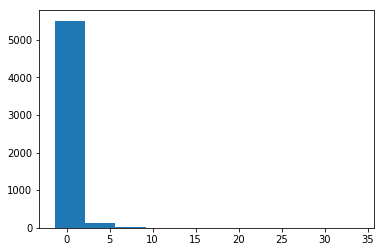

In [123]:
plt.hist(train_data.P4)

### Intuitively, error seems verry good, but we cannot give a conclution that this is the best as a high possibility of overfitting 

We will complete this process by a V-fold, since we split the train data, we will recalculate the scaler.

In [172]:
## V fold ： todo
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC, LinearRegression

In [185]:
X_train, X_test, y_train, y_test = train_test_split(train_data_org.loc[:, :"P40"], 
                                                    train_data_org.loc[:, ['sugar']], test_size=0.33, random_state=42)

In [188]:
X_train_m = train_data_org.loc[train_data_org['sex']==1].loc[:, :"P40"]
y_train_m = train_data_org.loc[train_data_org['sex']==1].loc[:, ['sugar']] 

In [191]:
X_train_f = train_data_org.loc[train_data_org['sex']==0].loc[:, :"P40"]
y_train_f = train_data_org.loc[train_data_org['sex']==0].loc[:, ['sugar']] 

In [173]:
model_lcv = LassoCV(fit_intercept=False, 
                    verbose=True, 
                    max_iter=3000, 
                    normalize=False, 
                    precompute='auto', 
                    cv=20, 
                    n_jobs=2, 
                    eps=1e-16, 
                    copy_X=True)
model_llcv = LassoLarsCV(fit_intercept=False, 
                         verbose=True,
                         max_iter=3000,
                         normalize=False, 
                         precompute='auto', 
                         cv=10, 
                         max_n_alphas=1000, 
                         n_jobs=2, 
                         eps=1e-16, 
                         copy_X=True, 
                         positive=False)
model_llic = LassoLarsIC(copy_X=True, 
                         criterion='bic', 
                         eps=1e-16, 
                         fit_intercept=True,
                         max_iter=500, 
                         normalize=True, 
                         positive=False, 
                         precompute='auto',
                         verbose=False)
model_lr = LinearRegression(fit_intercept=True, 
                            normalize=False, 
                            copy_X=True, 
                            n_jobs=1)

In [195]:
#model_lcv.fit(X_train_m, y_train_m.loc[:, 'sugar'])
#model_llcv.fit(X_train, y_train.loc[:, 'sugar'])
#model_llic.fit(X_train, y_train.loc[:, 'sugar'])
model_lr_f = model_lr
model_lr.fit(X_train_m, y_train_m.loc[:, 'sugar'])
model_lr_f.fit(X_train_f, y_train_f.loc[:, 'sugar'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [209]:
#print(0.5*mean_squared_error(y_train, model_lcv.predict(X_train)))
#print(0.5*mean_squared_error(y_train, model_llcv.predict(X_train)))
#print(0.5*mean_squared_error(y_train, model_llic.predict(X_train)))
print(0.5*mean_squared_error(y_train_m, model_lr.predict(X_train_m)))
print(0.5*mean_squared_error(y_train_f, model_lr_f.predict(X_train_f)))

1.35599775974
0.763742357564


In [235]:
# test model
# data path
test_filename = 'data1/d_test_A_20180102.csv'

''' there are two ways of doing encoding which includes 汉字:'''
#data = pd.read_csv(train_filename, sep=',', encoding='gb2312')
'''or by the following'''
data_test = pd.read_csv(test_filename, sep=',', encoding='gbk')
# fillna prefer not to be done when import data
#data = data.fillna('')

data_test.columns = ['id', 'sex', 'age', 'date'] + [dic[i] for i in data_test.columns[4:]]
data_test.loc[data_test['sex'] == "男",'sex'] = 1
data_test.loc[data_test['sex'] == "女",'sex'] = 0
data_test = data_test.drop(['id','date'],axis = 1)
data_test.loc[:,"P4":"P40"] = data_test.loc[:,"P4":"P40"].fillna(data_test.loc[:,"P4":"P40"].mean())
data_test.sex.fillna(-1, inplace=True)
data_test

,sex,age,P4,P5,P6,P7,P8,P9,P10,P11,...,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40
0,1,54,23.850000,26.690000,116.080000,34.360000,82.750000,46.030000,36.720000,1.250000,...,12.300000,241.00000,10.800000,12.80000,0.260000,58.400000,33.200000,7.500000,0.600000,0.30000
1,1,50,29.750000,34.980000,90.070000,111.430000,71.900000,44.090000,27.810000,1.590000,...,12.000000,242.00000,11.500000,14.60000,0.280000,59.300000,29.300000,7.700000,3.200000,0.50000
2,1,27,26.697951,27.237791,88.009178,38.366736,77.151178,46.054429,31.096748,1.500663,...,12.100000,398.00000,8.900000,9.90000,0.350000,50.200000,40.100000,7.900000,1.200000,0.60000
3,0,53,17.980000,16.630000,95.950000,23.410000,78.160000,45.440000,32.720000,1.390000,...,12.600000,247.00000,11.600000,13.90000,0.290000,53.700000,38.000000,7.200000,0.700000,0.40000
4,0,43,19.120000,19.800000,76.970000,15.700000,80.760000,46.900000,33.860000,1.390000,...,12.200000,335.00000,10.400000,11.90000,0.350000,52.000000,39.400000,8.000000,0.300000,0.30000
5,1,48,25.770000,17.660000,92.060000,26.010000,72.290000,45.450000,26.840000,1.690000,...,13.200000,217.00000,11.400000,14.90000,0.250000,56.800000,34.200000,8.000000,0.600000,0.40000
6,0,49,51.540000,40.530000,67.240000,23.230000,74.920000,45.600000,29.320000,1.560000,...,14.400000,490.00000,9.500000,10.10000,0.470000,58.600000,32.300000,7.100000,1.300000,0.70000
7,0,51,26.510000,24.770000,87.710000,26.600000,70.310000,44.390000,25.920000,1.710000,...,12.900000,241.00000,11.000000,13.40000,0.270000,55.400000,34.900000,8.000000,1.100000,0.60000
8,0,68,28.440000,22.990000,85.910000,38.570000,79.670000,44.540000,35.130000,1.270000,...,12.100000,369.00000,10.100000,11.80000,0.370000,55.200000,35.600000,7.000000,1.000000,1.20000
9,0,64,35.650000,29.050000,114.980000,202.290000,78.080000,44.580000,33.500000,1.330000,...,12.900000,199.00000,9.300000,10.40000,0.190000,54.300000,38.800000,5.000000,1.200000,0.70000


In [236]:
X_test_m = data_test.loc[data_test['sex']==1].loc[:, :"P40"]
X_test_f = data_test.loc[data_test['sex']==0].loc[:, :"P40"]

In [238]:
y_predict_m = model_lr.predict(X_test_m)
y_predict_f = model_lr_f.predict(X_test_f)

In [ ]:
pd.DataFrame(y_predict).to_csv("predict.csv", sep=',')

In [240]:
X_test_m

,sex,age,P4,P5,P6,P7,P8,P9,P10,P11,...,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40
0,1,54,23.850000,26.690000,116.080000,34.360000,82.750000,46.030000,36.720000,1.250000,...,12.300000,241.00000,10.800000,12.80000,0.260000,58.400000,33.200000,7.500000,0.600000,0.30000
1,1,50,29.750000,34.980000,90.070000,111.430000,71.900000,44.090000,27.810000,1.590000,...,12.000000,242.00000,11.500000,14.60000,0.280000,59.300000,29.300000,7.700000,3.200000,0.50000
2,1,27,26.697951,27.237791,88.009178,38.366736,77.151178,46.054429,31.096748,1.500663,...,12.100000,398.00000,8.900000,9.90000,0.350000,50.200000,40.100000,7.900000,1.200000,0.60000
5,1,48,25.770000,17.660000,92.060000,26.010000,72.290000,45.450000,26.840000,1.690000,...,13.200000,217.00000,11.400000,14.90000,0.250000,56.800000,34.200000,8.000000,0.600000,0.40000
11,1,71,25.160000,23.370000,55.890000,20.080000,68.600000,41.980000,26.620000,1.580000,...,13.000000,186.00000,10.500000,11.70000,0.190000,54.600000,33.000000,11.200000,0.800000,0.40000
12,1,69,29.620000,32.500000,115.890000,18.320000,65.770000,42.800000,22.970000,1.860000,...,13.700000,219.00000,11.100000,14.00000,0.240000,60.100000,29.500000,6.700000,3.000000,0.70000
14,1,63,16.940000,12.070000,76.720000,25.260000,80.280000,45.610000,34.670000,1.320000,...,12.500000,275.00000,11.200000,13.50000,0.310000,52.200000,40.100000,5.700000,1.300000,0.70000
19,1,68,97.900000,55.230000,96.230000,186.950000,78.000000,41.420000,36.580000,1.130000,...,13.400000,132.00000,10.300000,10.90000,0.140000,54.300000,28.600000,9.600000,6.800000,0.70000
20,1,27,25.010000,50.320000,90.550000,44.710000,76.630000,45.860000,30.770000,1.490000,...,12.800000,392.00000,9.700000,11.00000,0.380000,55.500000,36.100000,6.500000,1.200000,0.70000
22,1,67,21.610000,26.530000,105.410000,63.460000,72.120000,44.700000,27.420000,1.630000,...,12.100000,252.00000,10.900000,13.70000,0.280000,66.700000,24.100000,5.000000,3.300000,0.90000
